In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import datetime
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from get_decision_variable_map import get_decision_variable_map
from get_case_outputs_all_models import get_case_outputs_all_models

In [2]:
import os

current_dir = os.getcwd()
print(current_dir)

c:\Users\ks885\Documents\aa_research\Modeling\spcm_genx_experiment\figures


In [3]:
plots_path = os.path.join(current_dir, 'plots') + "/"
pdf_path = os.path.join(current_dir, 'pdf_tables') + "/"
latex_path = os.path.join(current_dir, 'latex') + "/"
csv_path = os.path.join(current_dir, 'csv') + "/"
jpg_path = os.path.join(current_dir, 'jpg') + "/"

In [4]:
pdc_path = os.path.join(jpg_path, 'pdc') + "/"
if not os.path.exists(pdc_path):
    os.makedirs(pdc_path)
    print("Directory '%s' created" % pdc_path)

In [5]:
# modeling scaling ModelScalingFactor
ModelScalingFactor = 1000

cem_path = os.path.join(os.path.dirname(current_dir), 'GenX.jl', 'research_systems')
policies_path = os.path.join(os.path.dirname(current_dir), 'SPCM', 'research_systems')

date = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

In [6]:
case_names = [    
              "Thermal_Base",
              "2_Hr_BESS", 
              "2_Hr_BESS_Fuelx2",
              "4_Hr_BESS",
              "4_Hr_BESS_Fuelx2",
              "4_Hr_BESS_Fuelx3",
              "4_Hr_BESS_Fuelx4",
              "6_Hr_BESS",
              "6_Hr_BESS_Fuelx2",
              "8_Hr_BESS",
              "8_Hr_BESS_Fuelx2",
              "10_Hr_BESS",
              "10_Hr_BESS_Fuelx2",
              ]

model_types = [
                'cem',
                'pf',
                'dlac-p',
                'dlac-i',
                'slac',
]

# Create a DataFrame with decision_variable_names as the index
decision_variable_map = get_decision_variable_map()


In [7]:
# get load data

load_data_raw = pd.read_csv(cem_path + '\\Thermal_Base\\' + 'system\\' + 'Demand_data.csv')
load_data = load_data_raw['Demand_MW_z1']

In [8]:
decision_variable_name = 'energy prices'
model_types_list = ['pf', 'dlac-p', 'dlac-i', 'slac']
# model_types_list = ['pf','dlac-p']
string_of_model_types = "_".join(model_types_list)

# Plotting Timeseries
# start_time = 500
# fractional_time = 0.015
fractional_time = 0.2

zone_list = ["1"]

In [26]:
def print_timeseries_data(decision_variable_name, model_types_list, case_name, 
                          fractional_time, jpg_path, cem_path, policies_path, date):

    cem_data, policies_data_dict, columns_2_print = get_case_outputs_all_models(cem_path, 
                                    policies_path, case_name, decision_variable_name, model_types_list)
    
    # end_time = start_time + min(round(fractional_time * len(load_data) - 1),8685)
    # time_period = [start_time, end_time]
    time_periods = [
        [int(i), int(min(i + round(fractional_time * len(load_data)) - 1, len(load_data) - 1))]
        for i in range(0, len(load_data), round(fractional_time * len(load_data)))
    ]

    # if decision_variable_name == 'non-served energy' or decision_variable_name == 'energy prices':
    #     column_names = zone_list
    # else:
    #     column_names = resource_list

    column_name = columns_2_print[0]  # Assuming you want to plot the first column

    folder_name = decision_variable_name + '_' + case_name + '_' \
                  + column_name + '_' + string_of_model_types + '_' + date

    if folder_name not in os.listdir(jpg_path):
        os.makedirs(jpg_path + folder_name)

    for time_period in time_periods:
        # modeling scaling ModelScalingFactor
        ModelScalingFactor = 1000

        # print(resource)
        plt.figure(figsize=(10, 6))
        
        # Plot CEM data for the selected time period
        plt.plot(cem_data.index[time_period[0]:time_period[1]], 
                    cem_data[column_name][time_period[0]:time_period[1]], 
                    label='CEM', linewidth=2, alpha=0.8)
        
        # Plot Policies data for each model type for the selected time period
        for model_type, policies_data in policies_data_dict.items():

            model_type_name = model_type.replace('_', '-').upper()
            plt.plot(policies_data.index[time_period[0]:time_period[1]], 
                        policies_data[column_name][time_period[0]:time_period[1]], 
                        label=f'Policies - {model_type_name}', linestyle='--', alpha=0.8)
        
        decision_variable_name = decision_variable_name.capitalize()

        # Add labels, title, and legend
        plt.xlabel('Time Steps')
        plt.ylabel(f'{decision_variable_name} [$/MWh]')
        case_name = case_name.replace('_', ' ')


        plt.title(f'CEM vs Policy, {decision_variable_name} for {case_name}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        # print jpg to folder_name
        plt.savefig(os.path.join(jpg_path, folder_name, f'{decision_variable_name}_{time_period}.jpg'), format='jpg')

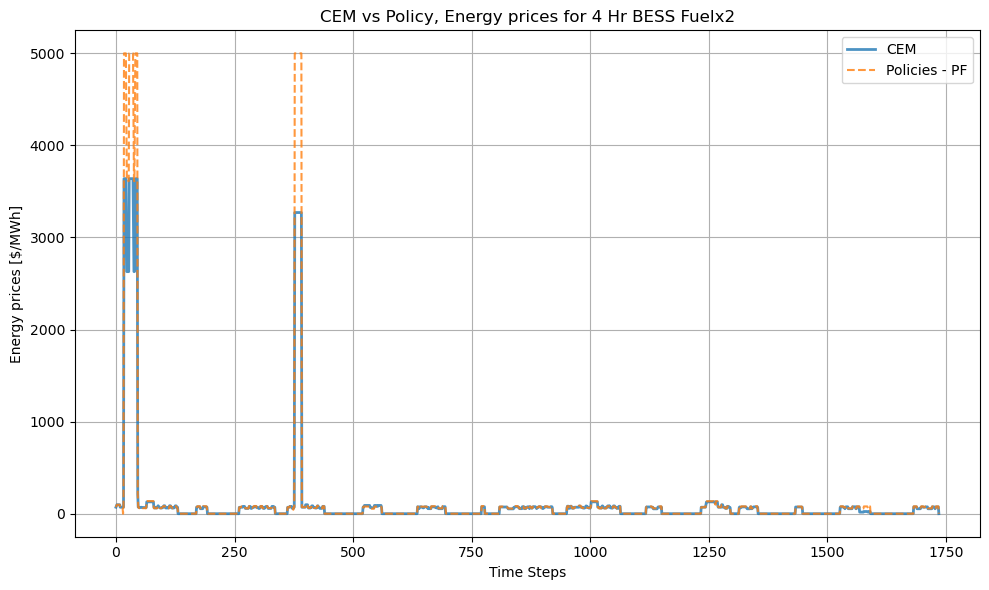

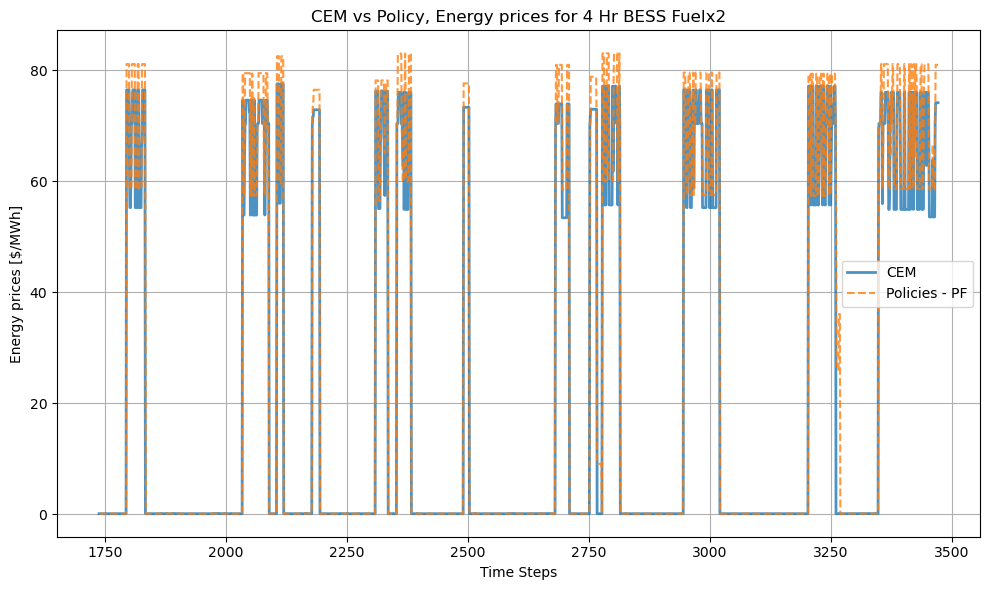

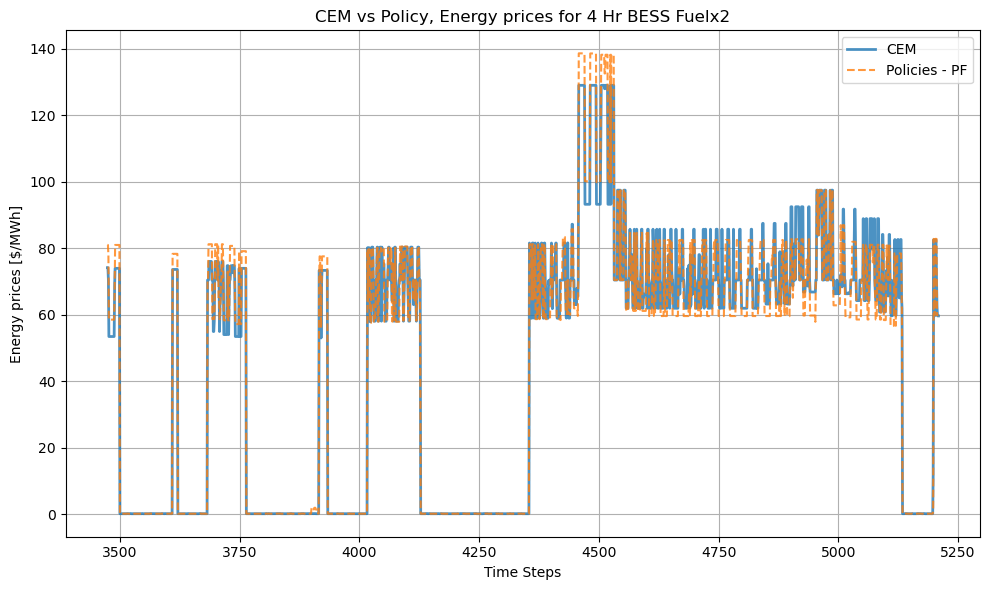

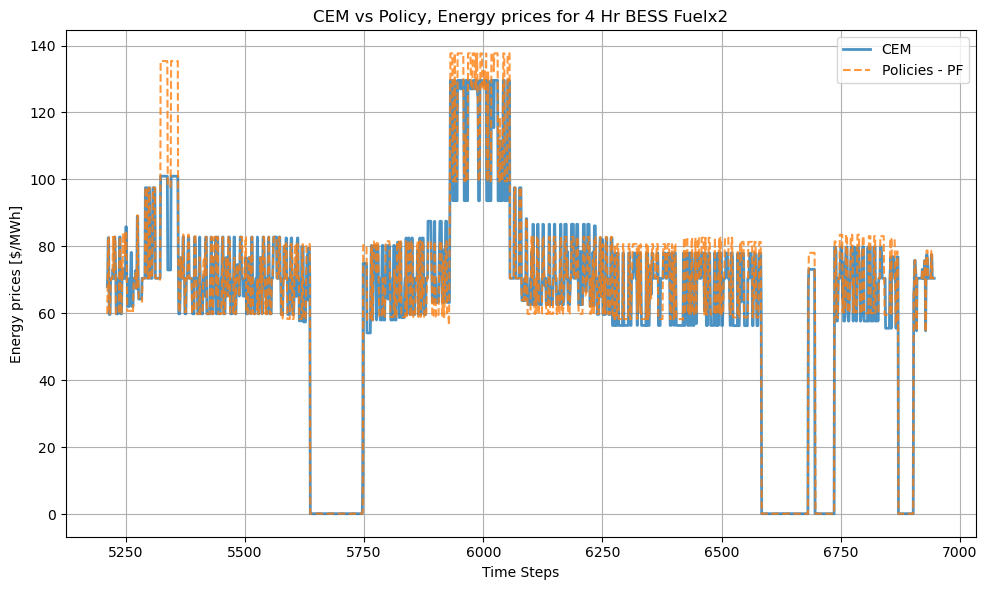

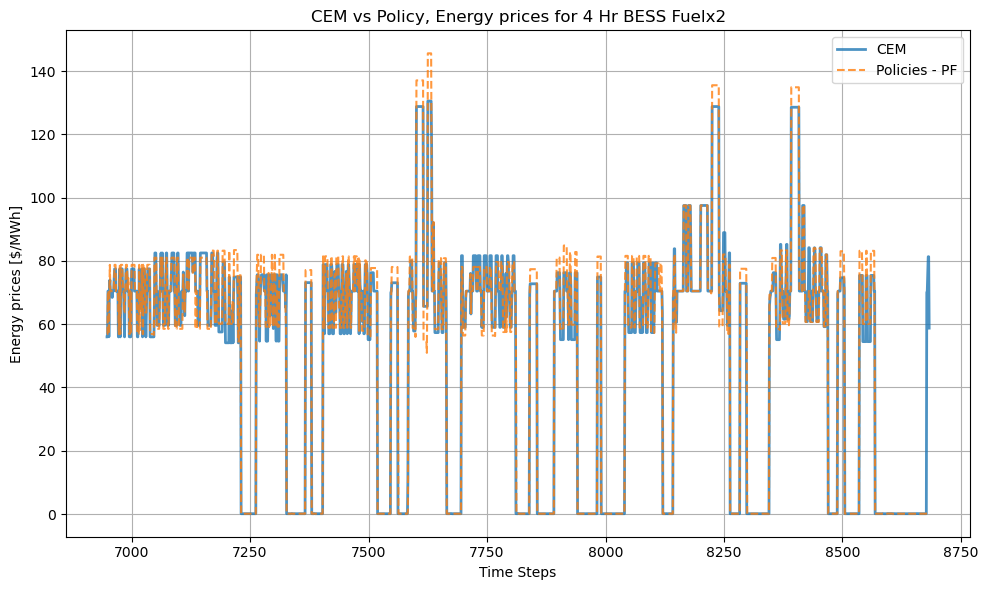

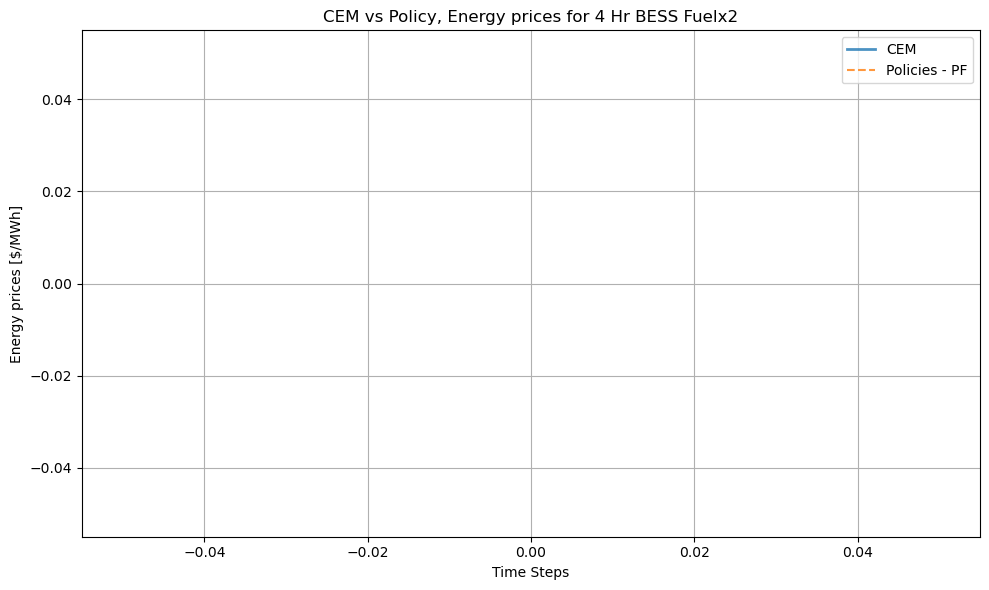

In [27]:
print_timeseries_data('energy prices', ['pf'],
                      '4_Hr_BESS_Fuelx2', 0.2, jpg_path, cem_path, policies_path, date)